In [15]:
%matplotlib notebook

In [111]:
import matplotlib.pyplot as plt
import torch
import sympy

from constraint_prog.sympy_func import SympyFunc
from constraint_prog.newton_raphson import jacobian, pseudo_inverse

plt.rcParams['figure.figsize'] = [6, 6]

In [90]:
xy = torch.stack(torch.meshgrid(
    torch.linspace(0.0, 3.0, 20),
    torch.linspace(0.0, 3.0, 20)), dim=-1)

print(xy.shape)

torch.Size([20, 20, 2])


In [99]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")
f1 = SympyFunc([x*y-1])
z1, j1 = jacobian(f1, xy)
u1 = -torch.matmul(pseudo_inverse(j1), z1.unsqueeze(dim=-1)).squeeze(-1)
print(z1.shape, j1.shape, u1.shape)

torch.Size([20, 20, 1]) torch.Size([20, 20, 1, 2]) torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>


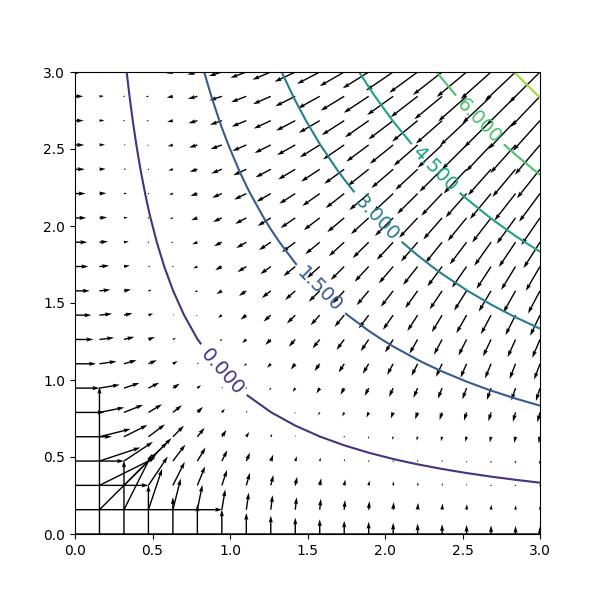

In [120]:
fig, ax1 = plt.subplots()
co1 = ax1.contour(
    xy[:, :, 0],
    xy[:, :, 1],
    z1[:, :, 0])
ax1.clabel(co1, inline=1, fontsize=14)
ax1.quiver(
    xy[:, :, 0], 
    xy[:, :, 1], 
    u1[:, :, 0],
    u1[:, :, 1], 
    angles='xy', scale=20)
plt.show()

In [114]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")
f2 = SympyFunc([y-1/x])
z2, j2 = jacobian(f2, xy)
u2 = -torch.matmul(pseudo_inverse(j2), z2.unsqueeze(dim=-1)).squeeze(-1)
print(z2.shape, j2.shape, u2.shape)

torch.Size([20, 20, 1]) torch.Size([20, 20, 1, 2]) torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>


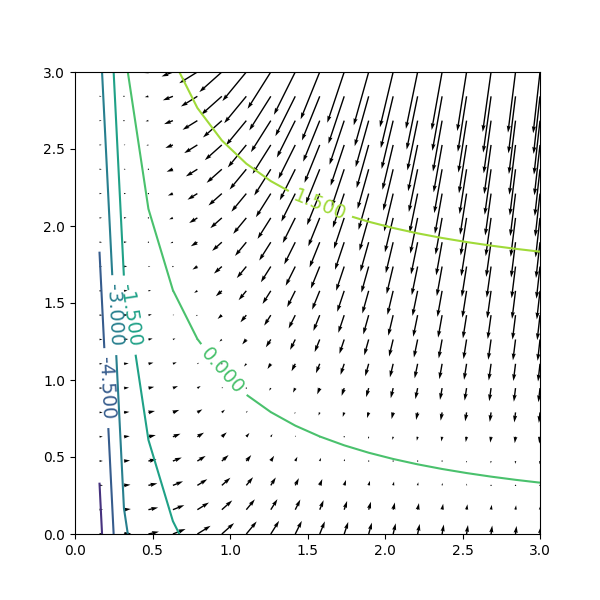

In [121]:
fig, ax1 = plt.subplots()
co1 = ax1.contour(
    xy[:, :, 0],
    xy[:, :, 1],
    z2[:, :, 0])
ax1.clabel(co1, inline=1, fontsize=14)
ax1.quiver(
    xy[:, :, 0], 
    xy[:, :, 1], 
    u2[:, :, 0],
    u2[:, :, 1], 
    angles='xy', scale=20)
plt.show()